In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from inflation.dataset.reader import InflationJSONA101DatasetReader, InflationDataset
from inflation.analysis.descriptive_analysis import calculate_missing_in_stocks, get_number_of_unique_entries

In [2]:
# Read dataset from json.gz

# reader = InflationJSONA101DatasetReader()
# dataset = reader.read("../../a101.all.json.gz")
# dataset = reader.read("../../a101.med.json.gz")

In [3]:
# Save dataset

# dataset.save_dataset('A101_full_data.pickle')

In [4]:
# Read dataset
dt = InflationDataset.read_dataset('../../inflation-resources/data/a101_full_data.pickle')

# Convert dataset to data frame
df = InflationDataset.to_df(dt)

df.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,sample_date
0,Ahşap Ramazan Davulu,https://www.a101.com.tr/anne-bebek/ahsap-ramaz...,26017745,,49.95,TRY,True,2021-11-30 00:31:22
1,Barbie Twistable Scooter 3 Tekerlekli,https://www.a101.com.tr/anne-bebek/barbie-twis...,26018419,,129.95,TRY,True,2021-12-04 15:51:21
2,Bebek Alt Üst Takım Beyaz,https://www.a101.com.tr/anne-bebek/bebek-alt-u...,26014709004,,19.95,TRY,True,2021-12-06 08:30:06
3,Berber Oyun Hamuru Seti,https://www.a101.com.tr/anne-bebek/berber-oyun...,26016222,,24.95,TRY,False,2021-12-08 07:13:18
4,Canbebe Islak Havlu 3x56 cm Adet,https://www.a101.com.tr/anne-bebek/canbebe-isl...,23000698,Canbebe,16.75,TRY,False,2021-12-07 09:04:26


In [5]:
# Create date column only contains day, month, year
df['date'] = df.sample_date.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
df['date'] = df.date.apply(lambda x: datetime.strftime(x, "%d-%m-%Y"))
#df['date'] = df.date.apply(lambda x: datetime.strptime(str(x), "%d-%m-%Y"))
#df['date'] = df['date'].apply(lambda x: datetime.strftime(x, '%d-%m-%Y'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_name   5543 non-null   object        
 1   product_url    5543 non-null   object        
 2   product_code   5543 non-null   object        
 3   product_brand  5543 non-null   object        
 4   price          5543 non-null   float64       
 5   currency       5543 non-null   object        
 6   in_stock       5543 non-null   bool          
 7   sample_date    5543 non-null   datetime64[ns]
 8   date           5543 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(6)
memory usage: 352.0+ KB


In [6]:
df.describe()

,price
count,5543.000000
mean,245.183675
std,839.561598
min,0.500000
25%,9.950000
50%,24.900000
75%,99.900000
max,14699.000000


In [7]:
# df.shape()
# TypeError: 'tuple' object is not callable  # Q: niyeyse patliyor?

In [8]:
# How many items are in stock?

calculate_missing_in_stocks(df)

('3391 items in stocks in total of 5543 items.',
 '61.18% of products in the stock.')

In [9]:
# Subset: only takes items that are in stocks

df_in_stock = df[df['in_stock'] == True]
print(len(df_in_stock))

# Drop original date column
df_in_stock = df_in_stock.drop(columns=['sample_date'])
print(df_in_stock.info())

3391
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3391 entries, 0 to 5539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   3391 non-null   object 
 1   product_url    3391 non-null   object 
 2   product_code   3391 non-null   object 
 3   product_brand  3391 non-null   object 
 4   price          3391 non-null   float64
 5   currency       3391 non-null   object 
 6   in_stock       3391 non-null   bool   
 7   date           3391 non-null   object 
dtypes: bool(1), float64(1), object(6)
memory usage: 215.2+ KB
None


In [10]:
# Sort by date
df_in_stock = df_in_stock.sort_values('date')
# Sort by name
# df_in_stock = df_in_stock.sort_values('product_name')

In [11]:
# Number of unique product # nasil bu kadar az olur ya?
df_in_stock['product_name'].nunique()

3172

In [12]:
# Number of unique product # nasil bu kadar az olur ya?
get_number_of_unique_entries(df_in_stock)

[('currency', 1),
 ('date', 43),
 ('product_brand', 405),
 ('product_code', 3047),
 ('product_url', 3107),
 ('product_name', 3172)]

In [13]:
# date range
#df_in_stock['date'] = pd.to_datetime(df_in_stock['date'], format='%d-%m-%Y')
df_in_stock.date.min(), df_in_stock.date.max()

('01-08-2021', '31-07-2021')

In [14]:
# Number of different days
len(df_in_stock['date'].value_counts())

43

In [15]:
# day's frequecies
df_in_stock['date'].value_counts()

18-09-2021    337
25-09-2021    283
28-09-2021    235
27-09-2021    195
20-09-2021    161
24-09-2021    161
08-05-2021    117
17-10-2021    111
14-05-2021    110
17-09-2021    106
26-10-2021     99
22-10-2021     99
30-11-2021     96
27-10-2021     94
20-04-2021     94
03-12-2021     92
21-09-2021     89
08-12-2021     87
04-12-2021     80
23-09-2021     73
11-05-2021     73
25-10-2021     60
31-07-2021     60
20-10-2021     52
17-06-2021     49
06-12-2021     41
19-04-2021     41
09-12-2021     38
25-06-2021     35
28-07-2021     32
29-11-2021     30
19-09-2021     27
30-07-2021     23
15-04-2021     21
27-11-2021     21
07-12-2021     14
23-10-2021     10
28-10-2021     10
24-10-2021      9
15-06-2021      9
01-08-2021      7
24-06-2021      5
13-05-2021      5
Name: date, dtype: int64

<AxesSubplot:xlabel='count', ylabel='date'>

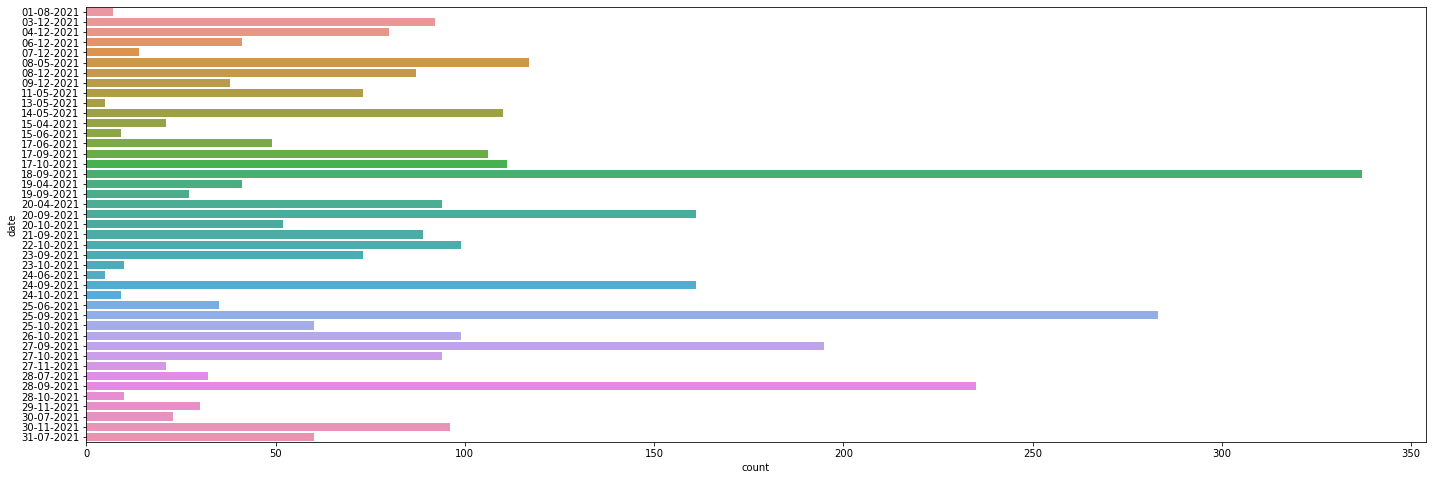

In [16]:
plt.figure(figsize=(24,8)) #Q: bu niye hatali cikmaya basladi saatleri almama ragmen?
sns.countplot(y="date", data=df_in_stock)

In [17]:
# monthly data frequencies
# derive monthly data
df_in_stock['date'] = df_in_stock.date.apply(lambda x: datetime.strptime(str(x), "%d-%m-%Y"))
df_in_stock['month'] = df_in_stock['date'].apply(lambda x: pd.Timestamp.strftime(x, '%m'))

<AxesSubplot:xlabel='count', ylabel='month'>

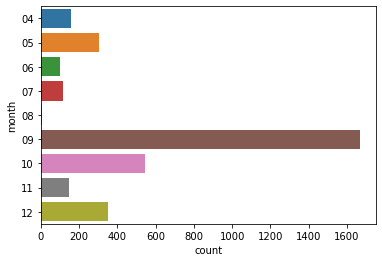

In [18]:
df_in_stock = df_in_stock.sort_values('date')
sns.countplot(y="month", data=df_in_stock)

In [19]:
# Find items that have more than one time frame
values = pd.DataFrame(df_in_stock['product_name'].value_counts())

values.index.name = 'product_name'
values.columns = ['counts']

values = values[values["counts"] > 1] # filter items occurrences is more than 1
values.head()

,counts
product_name,
Crocs Crocband Çocuk Terlik,11
Crocs Crocband Erkek/Kadın Terlik,7
"10X15 Cm 100 Yaprak Not Defteri Çizgili, Sarı",4
A4 60 Yaprak Dikişli Pp Kaplı Defter - Su Yeşili,4
Triathlon Futbol Topu,3


In [20]:
# Subset: Subset the dataset items that occurred in dataset at least 2 times.

# Getting names
names = values.index
names = list(names)

# Subsetting with that list

df_filtered  = df_in_stock.loc[df_in_stock['product_name'].isin(names)]
df_filtered.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,date,month
5457,Her Şey Zihinde Başlar,https://www.a101.com.tr/kitap-kirtasiye/her-se...,26000620,,20.90,TRY,True,2021-04-15,04
5394,My Bottle Cam Matara 470 Cc,https://www.a101.com.tr/ev-yasam/my-bottle-cam...,26009105,My Bottle,12.95,TRY,True,2021-04-15,04
5346,Crocs Crocband Çocuk Terlik,https://www.a101.com.tr/ev-yasam/crocs-crocban...,26011707013,Crocs,194.95,TRY,True,2021-04-15,04
5403,Rooc Bıçak Seti 6 Parça,https://www.a101.com.tr/ev-yasam/rooc-bicak-se...,26005532,Rooc,60.95,TRY,True,2021-04-15,04
5530,Ustasından Çorba Mercimek 76 G,https://www.a101.com.tr/market/ustasindan-corb...,18001887,Ustasindan,1.75,TRY,True,2021-04-19,04


In [21]:
df_grouped = df_filtered.groupby(by='product_name') # calismiyor ya
df_grouped.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,date,month
5457,Her Şey Zihinde Başlar,https://www.a101.com.tr/kitap-kirtasiye/her-se...,26000620,,20.90,TRY,True,2021-04-15,04
5394,My Bottle Cam Matara 470 Cc,https://www.a101.com.tr/ev-yasam/my-bottle-cam...,26009105,My Bottle,12.95,TRY,True,2021-04-15,04
5346,Crocs Crocband Çocuk Terlik,https://www.a101.com.tr/ev-yasam/crocs-crocban...,26011707013,Crocs,194.95,TRY,True,2021-04-15,04
5403,Rooc Bıçak Seti 6 Parça,https://www.a101.com.tr/ev-yasam/rooc-bicak-se...,26005532,Rooc,60.95,TRY,True,2021-04-15,04
5530,Ustasından Çorba Mercimek 76 G,https://www.a101.com.tr/market/ustasindan-corb...,18001887,Ustasindan,1.75,TRY,True,2021-04-19,04
...,...,...,...,...,...,...,...,...,...
706,Asperox Ultra Kireç Pas Sökücü Mavi güç 1L,https://www.a101.com.tr/market/asperox-ultra-k...,22001923,Asperox,14.90,TRY,True,2021-12-09,12
325,Marie Claire Kadın Kaplı Sütyen Desenli Ekru,https://www.a101.com.tr/ev-yasam/marie-claire-...,25002195001,Marie Claire,19.95,TRY,True,2021-12-09,12
302,Kadın Kazak Bej,https://www.a101.com.tr/ev-yasam/kadin-kazak-b...,26016301003,Diğer,37.95,TRY,True,2021-12-09,12
363,Skechers Kadın Bot Siyah,https://www.a101.com.tr/ev-yasam/skechers-kadi...,26015383002,Skechers,779.00,TRY,True,2021-12-09,12
